In [1]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\DOANTR~1\AppData\Local\Temp/ipykernel_4540/4289637588.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# A function that creates and trains the model

In [2]:
def build_and_train_the_model(x, y):
  # Build the model
  ANN_reg = nn.Sequential(
    nn.Linear(in_features=1, out_features=1), # Input layer
    nn.ReLU(),                                # Activation Function
    nn.Linear(in_features=1, out_features=1), # Output layer
  )

  # Loss and optimizer functions
  loss_func = nn.MSELoss()
  optimizer = torch.optim.SGD(params=ANN_reg.parameters(), lr=.05)

  ## Train the model
  num_epochs  = 500
  losses      = torch.zeros(num_epochs)

  for epoch in range(num_epochs):
    # Forward pass
    y_hat = ANN_reg(x)
    # Compute loss
    loss          = loss_func(y_hat, y)
    losses[epoch] = loss
    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  ## End training loop

  ## Compute model predictions
  predictions = ANN_reg(x)

  # output: 
  return predictions, losses

In [3]:
# m: Slope
def create_the_data(m):
  N = 50
  x = torch.randn(N, 1)
  y = m * x + torch.randn(N, 1) / 2
  return x, y

# Test it once

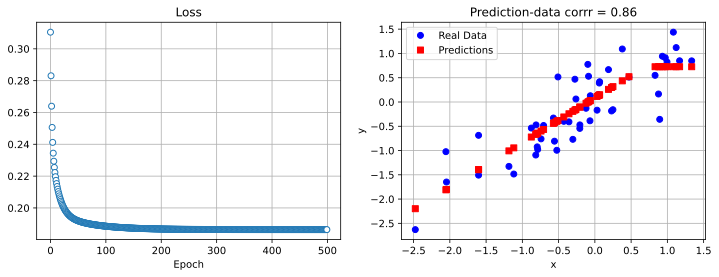

In [13]:
# Create a dataset
x, y = create_the_data(m=.8)

# Run the model
y_hat, losses = build_and_train_the_model(x, y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')
ax[0].grid()

ax[1].plot(x, y, 'bo', label='Real Data')
ax[1].plot(x, y_hat.detach(), 'rs', label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'Prediction-data corrr = {np.corrcoef(y.T, y_hat.detach().T)[0, 1]:.2f}')
ax[1].legend()
ax[1].grid()

plt.show()


# Now for the experiment!

In [14]:
# (takes 3 mins with 21 slopes and 50 exps)

# The slopes to simulate
slopes = np.linspace(start=-2, stop=2, num=21)
num_exper = 50

# Initialize output matrix
results = np.zeros(shape=(len(slopes), num_exper, 2))

for slope in range(len(slopes)):
  for exper in range(num_exper):
    # Create a dataset and run the model
    x, y = create_the_data(m=slopes[slope])
    y_hat, losses = build_and_train_the_model(x, y)
    # Store the final loss and performance
    results[slope, exper, 0] = losses[-1]
    results[slope, exper, 1] = np.corrcoef(y.T, y_hat.detach().T)[0, 1]

# Correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0

C:\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


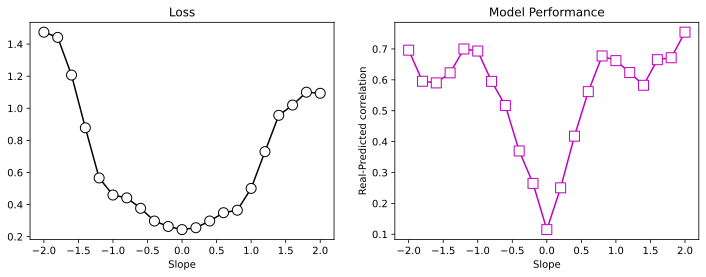

In [15]:
# Plot the results!

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].plot(slopes, np.mean(results[:, :, 0], axis=1), 'ko-', markerfacecolor='w', markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes, np.mean(results[:, :, 1], axis=1), 'ms-', markerfacecolor='w', markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-Predicted correlation')
ax[1].set_title('Model Performance')

plt.show()



In [ ]:
# Extra code to visualize data with different slopes

m = 2

x,y = createTheData(m)

plt.title('Slope = ' + str(m))
plt.plot(x,y,'o')
plt.ylim([-4,4])
plt.xlabel('x')
plt.ylabel('y')
plt.show()